In [43]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
md = pd.read_csv("mouse_drug_data.csv")

cd = pd.read_csv("clinicaltrial_data.csv")

# Combine the data into a single dataset
merged_data = pd.merge(md , cd, left_on="Mouse ID", right_on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:

drug_time = merged_data.groupby(["Drug", "Timepoint"])
m_t_v = drug_time["Tumor Volume (mm3)"].mean()

response = pd.DataFrame(m_t_v)

response.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

d_t = merged_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# setv = d_t["Tumor Volume (mm3)"].std()
# setv



response_setv_df = pd.DataFrame(d_t)

response_setv_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames

reformated_response = response.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
reformated_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0.5, 1.0, 'Response to Tumor Treatment')

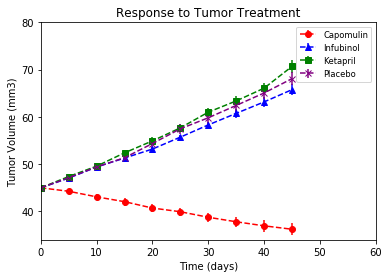

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, 50, 5), response.loc["Capomulin", 'Tumor Volume (mm3)'],
            yerr = response_setv_df.loc["Capomulin", "Tumor Volume (mm3)"],
            color = 'r', marker = 'o', linestyle = '--', label = "Capomulin")
ax.errorbar(np.arange(0, 50, 5), response.loc["Infubinol", 'Tumor Volume (mm3)'],
            yerr = response_setv_df.loc["Infubinol", "Tumor Volume (mm3)"],
            color = 'b', marker = '^', linestyle = '--', label = "Infubinol")
ax.errorbar(np.arange(0, 50, 5), response.loc["Ketapril", 'Tumor Volume (mm3)'],
            yerr = response_setv_df.loc["Ketapril", "Tumor Volume (mm3)",],
            color = 'g', marker = 's', linestyle = '--', label = "Ketapril")
ax.errorbar(np.arange(0, 50, 5), response.loc["Placebo", 'Tumor Volume (mm3)'],
            yerr = response_setv_df.loc["Placebo", "Tumor Volume (mm3)"],
            color = 'purple', marker = 'x', linestyle = '--', label = "Placebo")


plt.legend(loc="best", fontsize="small", fancybox=True)

ax.set_xlim(0,60)
ax.set_ylim(34, 80)

ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.title("Response to Tumor Treatment")
# Save the Figure



In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:

df = merged_data.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]

met_means = df.groupby(["Drug", "Timepoint"]).mean()

met_means.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sems_gb = merged_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
met_sems = pd.DataFrame(sems_gb)
met_sems.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [19]:
# Minor Data Munging to Re-Format the Data Frames
reformated_data = met_sems.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
reformated_data.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


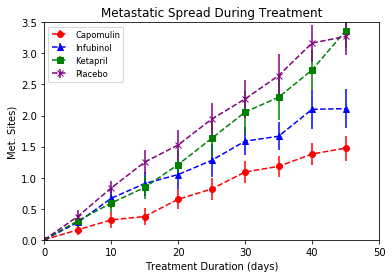

In [29]:
# Generate the Plot (with Error Bars)
fig, bc = plt.subplots()

bc.errorbar(np.arange(0, 50, 5), met_means.loc["Capomulin", 'Metastatic Sites'],
            yerr = met_sems.loc["Capomulin", "Metastatic Sites"],
            color = 'r', marker = 'o', linestyle = '--', label = "Capomulin")
bc.errorbar(np.arange(0, 50, 5), met_means.loc["Infubinol", 'Metastatic Sites'],
            yerr = met_sems.loc["Infubinol", "Metastatic Sites"],
            color = 'b', marker = '^', linestyle = '--', label = "Infubinol")
bc.errorbar(np.arange(0, 50, 5), met_means.loc["Ketapril", 'Metastatic Sites'],
            yerr = met_sems.loc["Ketapril", "Metastatic Sites",],
            color = 'g', marker = 's', linestyle = '--', label = "Ketapril")
bc.errorbar(np.arange(0, 50, 5), met_means.loc["Placebo", 'Metastatic Sites'],
            yerr = met_sems.loc["Placebo", "Metastatic Sites"],
            color = 'purple', marker = 'x', linestyle = '--', label = "Placebo")


plt.legend(loc="best", fontsize="small", fancybox=True)

bc.set_xlim(0,50)
bc.set_ylim(0.0, 3.5)

bc.set_xlabel("Treatment Duration (days)")
bc.set_ylabel("Met. Sites)")

plt.title("Metastatic Spread During Treatment")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [34]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse = merged_data.groupby(["Drug", "Timepoint"])
m_count = drug_time["Mouse ID"].count()

m_count_df = pd.DataFrame(m_count)

m_count_df.head()
# Convert to DataFrame

# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [35]:
# Minor Data Munging to Re-Format the Data Frames
reformated_mouse = m_count_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')  
reformated_mouse.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [65]:
mouse_rate = (m_count_df / m_count_df.iloc[0]).round()*100
mouse_rate.head()

Mouse ID
Drug      Timepoint          
Capomulin 0             100.0
          5             100.0
          10            100.0
          15            100.0
          20            100.0

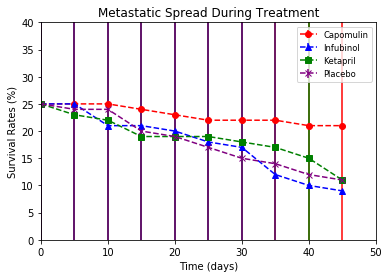

In [72]:
# Generate the Plot (Accounting for percentages)

fig, de = plt.subplots()

de.errorbar(np.arange(0, 50, 5), m_count_df.loc["Capomulin", 'Mouse ID'],
            yerr = mouse_rate.loc["Capomulin", "Mouse ID"],
            color = 'r', marker = 'o', linestyle = '--', label = "Capomulin")
de.errorbar(np.arange(0, 50, 5), m_count_df.loc["Infubinol", 'Mouse ID'],
            yerr = mouse_rate.loc["Infubinol", "Mouse ID"],
            color = 'b', marker = '^', linestyle = '--', label = "Infubinol")
de.errorbar(np.arange(0, 50, 5), m_count_df.loc["Ketapril", 'Mouse ID'],
            yerr = mouse_rate.loc["Ketapril", "Mouse ID"],
            color = 'g', marker = 's', linestyle = '--', label = "Ketapril")
de.errorbar(np.arange(0, 50, 5), m_count_df.loc["Placebo", 'Mouse ID'],
            yerr = mouse_rate.loc["Placebo", "Mouse ID"],
            color = 'purple', marker = 'x', linestyle = '--', label = "Placebo")


plt.legend(loc="best", fontsize="small", fancybox=True)

de.set_xlim(0,50)
de.set_ylim(0, 40)

de.set_xlabel("Time (days)")
de.set_ylabel("Survival Rates (%)")

plt.title("Metastatic Spread During Treatment")
# Save the Figure

# Show the Figure
plt.show()

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)